### **Parte 2 - Red Neuronal Convolucional**

**Base de datos de imagenes de deportes**: El objetivo será clasificar de qué deporte se trata dada una imágen.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Carga de dataset**

In [7]:
train_dir_badminton = os.path.join('/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/badminton')
train_dir_baseball = os.path.join('/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/baseball')
#train_dir_boxing = os.path.join('/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/boxing')
train_dir_football = os.path.join('/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/football')
#train_dir_hockey = os.path.join('/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/hockey')
#train_dir_swimming = os.path.join('/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/swimming')
#train_dir_tennis = os.path.join('/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/tennis')
#train_dir_volleyball = os.path.join('/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/volleyball')

train_badminton_names = os.listdir(train_dir_badminton)
train_baseball_names = os.listdir(train_dir_baseball)
#train_boxing_names = os.listdir(train_dir_boxing)
train_football_names = os.listdir(train_dir_football)
#train_hockey_names = os.listdir(train_dir_hockey)
#train_swimming_names = os.listdir(train_dir_swimming)
#train_tennis_names = os.listdir(train_dir_tennis)
#train_volleyball_names = os.listdir(train_dir_volleyball)

**Visualización de imagenes**

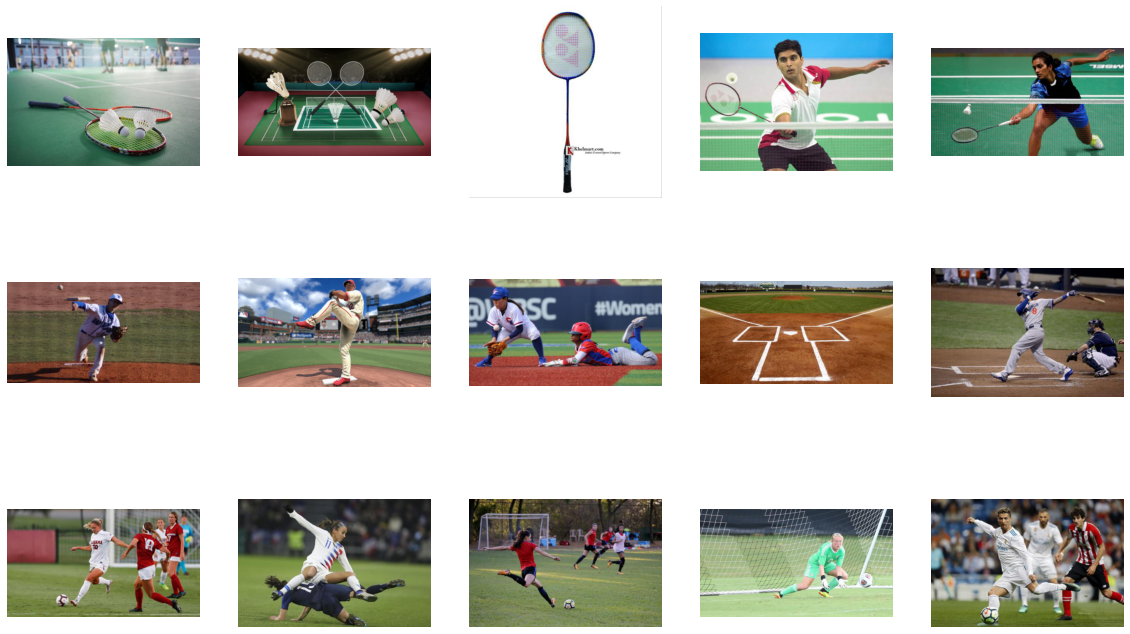

In [8]:
rows = 3
cols = 5

fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)

list_badminton = [os.path.join(train_dir_badminton, fname) for fname in train_badminton_names[0:5]]
list_baseball = [os.path.join(train_dir_baseball, fname) for fname in train_baseball_names[0:5]]
#list_boxing = [os.path.join(train_dir_boxing, fname) for fname in train_boxing_names[0:5]]
list_football = [os.path.join(train_dir_football, fname) for fname in train_football_names[0:5]]
#list_hockey = [os.path.join(train_dir_hockey, fname) for fname in train_hockey_names[0:5]]
#list_swimming = [os.path.join(train_dir_swimming, fname) for fname in train_swimming_names[0:5]]
#list_tennis = [os.path.join(train_dir_tennis, fname) for fname in train_tennis_names[0:5]]
#list_volleyball = [os.path.join(train_dir_volleyball, fname) for fname in train_volleyball_names[0:5]]

for i, img_path in enumerate(list_badminton+list_baseball+list_football):
    sp = plt.subplot(rows, cols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.core import Activation
from keras.layers import Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

cnn = Sequential()

cnn.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(300,300,3)))
cv1 = Activation("relu")
cnn.add(cv1)

cv2 = MaxPooling2D(pool_size=(3,3))
cnn.add(cv2)

cnn.add(Conv2D(32,(3,3)))
cv3 = Activation("relu")
cnn.add(cv3)
cv4 = MaxPooling2D(pool_size=(3,3))
cnn.add(cv4)

cnn.add(Conv2D(64,(3,3)))
cv5 = Activation("relu")
cnn.add(cv5)
cv6 = MaxPooling2D(pool_size=(3,3))
cnn.add(cv6)

cnn.add(Conv2D(64,(3,3)))
cv7 = Activation("relu")
cnn.add(cv7)
cv8 = MaxPooling2D(pool_size=(3,3))
cnn.add(cv8)

cnn.add(Flatten())
cnn.add(Dense(units=512, activation="relu"))
cnn.add(Dense(units=1, activation="sigmoid"))

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 298, 298, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1

In [11]:
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255.)

In [14]:
strDataTrain="/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train"
strDataTest="/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_test"

In [15]:
train_set=train_datagen.flow_from_directory(
    strDataTrain,
    target_size=(300,300),
    batch_size=128,
    class_mode="binary"
)

Found 2701 images belonging to 3 classes.


In [16]:
test_set=test_datagen.flow_from_directory(
    strDataTest,
    target_size=(300,300),
    batch_size=128,
    class_mode="binary"
)

Found 44 images belonging to 3 classes.


In [19]:
batch_size = 45
cnn.fit(train_set,
        steps_per_epoch=int(900/batch_size),
        epochs=15,
        validation_data=test_set,
        validation_steps=int(200/batch_size),
        verbose=1)

Epoch 1/15
20/20 [==============================] - 151s 8s/step - loss: -0.1086 - accuracy: 0.3329 - val_loss: 0.0792 - val_accuracy: 0.3182
Epoch 2/15
20/20 [==============================] - 147s 7s/step - loss: -1.3466 - accuracy: 0.3346
Epoch 3/15
20/20 [==============================] - 145s 7s/step - loss: -37.9883 - accuracy: 0.3362
Epoch 4/15
20/20 [==============================] - 153s 8s/step - loss: -656.1071 - accuracy: 0.3430
Epoch 5/15
20/20 [==============================] - 150s 8s/step - loss: -6358.2778 - accuracy: 0.3423
Epoch 6/15
20/20 [==============================] - 150s 8s/step - loss: -28736.0098 - accuracy: 0.3554
Epoch 7/15
20/20 [==============================] - 145s 7s/step - loss: -185426.4844 - accuracy: 0.3501
Epoch 8/15
20/20 [==============================] - 148s 7s/step - loss: -738431.0000 - accuracy: 0.3485
Epoch 9/15
20/20 [==============================] - 148s 7s/step - loss: -1746725.5000 - accuracy: 0.3501
Epoch 10/15
20/20 [=============

(1, 300, 300, 3)


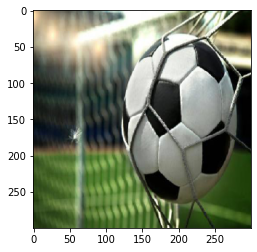

In [4]:
from keras.preprocessing import image
img_path = '/content/drive/My Drive/Universidad Galileo/Tercer Trimestre/Statistical Learning II/Proyecto/2-CNN/data_train/football/00000020.jpg'


img = image.load_img(img_path, target_size=(300, 300))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

In [5]:
from keras import models

layer_outputs = [layer.output for layer in cnn.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=cnn.input, outputs=layer_outputs)

NameError: ignored

(1, 298, 298, 16)


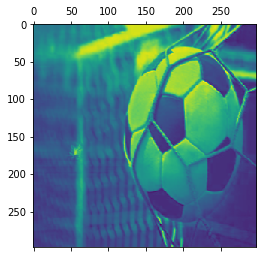

In [93]:
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

# We slice the third channel and preview the results
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

(1, 298, 298, 16)


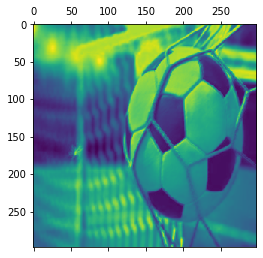

In [89]:
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

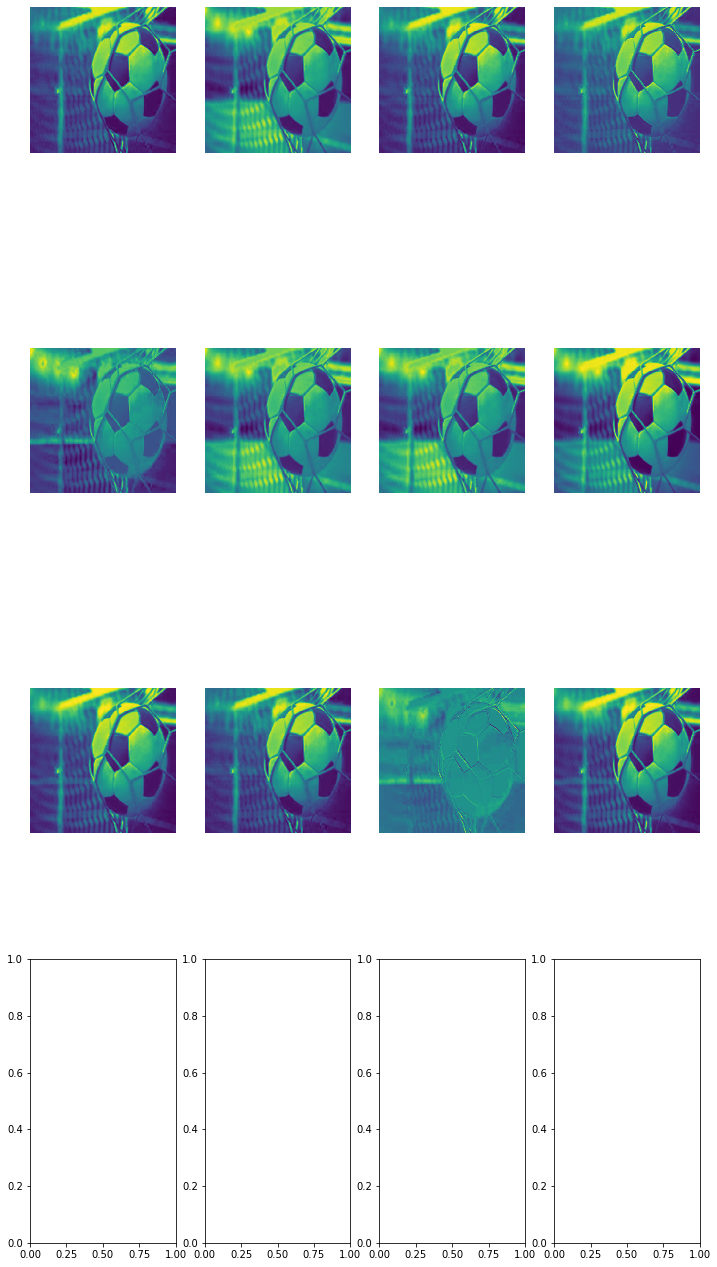

In [106]:
fig, axes = plt.subplots(4, 4, figsize=(12,24))
for i in range(12):
    row = i//4
    column = i%4
    ax = axes[row, column]
    ax.axis('Off')
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

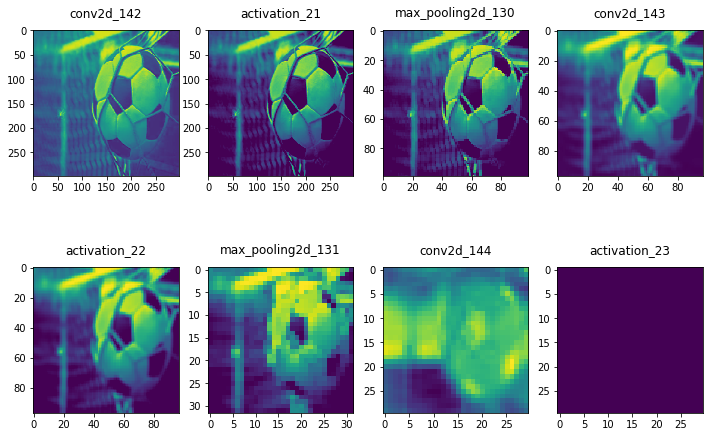

In [95]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in cnn.layers[:8]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 3], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

In [78]:
layer_names

['activation_21',
 'max_pooling2d_130',
 'conv2d_143',
 'activation_22',
 'max_pooling2d_131',
 'conv2d_144']

In [59]:
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

In [71]:
from keras import backend as K

def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + cnn.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i])

In [76]:
K.function([K.learning_phase()] + cnn.inputs, [cv1.output])

ValueError: ignored